In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # plotting library
import sklearn
from sklearn.cluster import KMeans

# The Chicago Hardship Index

## Raw Data and Summary Statistics
The hardship index is a way to use data to explore urban inequities. Exploratory data analysis for social justice issues should aim to be accessible, significant, equitable, impartial, and transparent. 

<img src="table1.png" alt="Drawing" style="width: 500px;"/>

The hardship index (HI) is the mean of six indicator estimates. Each indicator has been normalized and scaled from 0-100 (except per capita income). A higher hardship index value indicates greater hardship. The 6 raw indicator estimates are complicated by time variation over 5-year periods (US Census Bureau 2008) and geographical boundary approximation (Great Cities Institute 2019). The indicators are
<ul>
    <li> UNEMP = % of community age 16 and older who are unemployed </li>
     <li> NOHS = % of community age 25 and older without a high school diploma </li>
         <li> DEP = % of community who are dependent (under age 18 or over age 64) </li>
             <li> HOUS= % of community with overcrowded housing (more than 1 occupant per room)</li>
                 <li> POV = % below federal poverty line
    <li> INC = per capita income</li>


    
 Datafile:  'HIHOM20142017.xlsx'
             
 Data Source: https://greatcities.uic.edu/wp-content/uploads/2016/07/GCI-Hardship-Index-Fact-SheetV2.pdf (2010-2014) https://greatcities.uic.edu/wp-content/uploads/2019/12/Hardship-Index-Fact-Sheet-2017-ACS-Final-1.pdf (2013-2017).   

## Summary Statistics

1) Upload the hardship index data for 2014 and 2017. The first two of seventy-seven community areas in Chicago are printed below.

In [3]:
raw_hardship=pd.read_excel('HIHOM20142017.xlsx')
raw_hardship.head(2)

,Community,index,population(K),HI14,UNEMP14,NOHS14,DEP14,HOUS14,POV14,INC14,...,UNEMP17,NOHS17,DEP17,HOUS17,POV17,INC17,HOM14,HOM17,LAT,LON
0,Albany Park,13,48.0,47.0,10.0,26.9,32.2,9.5,18.3,23240,...,7.1,14.3,32.0,8.6,16.5,25848,2,1,41.96823,-87.72421
1,Archer Heights,56,14.0,54.4,14.3,32.2,38.5,9.8,14.6,16507,...,9.2,17.9,40.2,9.7,15.9,18497,0,3,41.81093,-87.72677


2) Separate the 2014 and 2017 hardship index (HI) data into two dataframes called "dfHI14" and "dfHI17." The column names will reflect the year.

In [4]:
dfHI14=raw_hardship[["Community","HI14","UNEMP14","NOHS14","DEP14","HOUS14","POV14","INC14"]]
dfHI14 = dfHI14.rename(columns = {'Community':'Community14'})
dfHI17=raw_hardship[["Community","HI17","UNEMP17","NOHS17","DEP17","HOUS17","POV17","INC17"]]
dfHI17 = dfHI17.rename(columns = {'Community':'Community17'})

3) The first two communities' HI and the indicator scores for 2014 are printed below.

In [5]:
dfHI14.head(2)

,Community14,HI14,UNEMP14,NOHS14,DEP14,HOUS14,POV14,INC14
0,Albany Park,47.0,10.0,26.9,32.2,9.5,18.3,23240
1,Archer Heights,54.4,14.3,32.2,38.5,9.8,14.6,16507


4) The scores for two communities in 2017 are printed below.

In [6]:
dfHI17.head(2)

,Community17,HI17,UNEMP17,NOHS17,DEP17,HOUS17,POV17,INC17
0,Albany Park,45.7,7.1,14.3,32.0,8.6,16.5,25848
1,Archer Heights,56.1,9.2,17.9,40.2,9.7,15.9,18497


5) Calculate the summary statistics for indicators from the data in all seventy-seven communities.
For example, we calculate statistics for the HOUS indicator in 2017. By replacing "HOUS17," statistics for other indicators can be calculated--like "HI17," "NOHS17", etc.

In [7]:
x=dfHI17["HOUS17"]
import numpy
print("Minimum: ", numpy.min(x))
print("Maximum: ", numpy.max(x))
print("Standard Deviation: ", numpy.std(x))
print("Mean: ", numpy.mean(x))
print("Median: ", numpy.median(x))

Minimum:  0.3
Maximum:  13.6
Standard Deviation:  2.87070805717617
Mean:  4.114285714285715
Median:  3.3


The table below lists the indicator values for several communities, as shown above, and the summary statistics for each indicator.

<img src="hardship.png" alt="Drawing" style="width: 500px;"/>

## K-Means Clustering

We will use a machine learning method called K-means clustering  (see Chapter 10.3) to visualize patterns in the geographic information. By plotting the homocide data with it, twe can investigate a relationship between location, hardship cluster, and number of homocides.  We use the sklearn library for machine learning.


Datafile:  'standardizedindicators.xlsx'


1) Read standardized hardship index and homicde data.

In [8]:
hom_df = pd.read_excel('standardizedindicators.xlsx')
hom_df.head(2)

,Community,index,HI14,UNEMP14,NOHS14,DEP14,HOUS14,POV14,INC14,HI17,UNEMP17,NOHS17,DEP17,HOUS17,POV17,INC17,HOM14,HOM17,LAT,LON
0,Albany Park,13,47.0,-0.705481,0.667993,-0.470891,1.42992,-0.353466,-0.165118,45.7,-0.706842,0.506067,-0.530539,1.562581,-0.418499,-0.183089,2,1,41.96823,-87.72421
1,Archer Heights,56,54.4,-0.193683,1.136956,0.471085,1.51857,-0.672245,-0.605100,56.1,-0.442634,1.090575,0.742190,1.945762,-0.473646,-0.607925,0,3,41.81093,-87.72677


2) Create dataframe with just HI and HOM 2017 info



In [9]:
HIHOM=hom_df[["UNEMP17","NOHS17","DEP17","HOUS17","POV17","INC17"]]
HIHOM.head()

,UNEMP17,NOHS17,DEP17,HOUS17,POV17,INC17
0,-0.706842,0.506067,-0.530539,1.562581,-0.418499,-0.183089
1,-0.442634,1.090575,0.742190,1.945762,-0.473646,-0.607925
2,-0.128101,2.243355,0.773232,0.552377,1.575995,-0.574983
3,0.035456,-0.257040,0.229994,-0.283653,-0.896442,-0.290469
4,1.054544,0.018978,0.586979,-0.771338,0.629300,-0.609312


3) Use the KMeans() function to make n_clusters=2 clusters and get the labels indicating which cluster each point belongs to.

In [10]:
# Fit the k means model
k_means = KMeans(init="k-means++", n_clusters=2, n_init=2)
k_means.fit(HIHOM)
#Get Labels
k_means_labels = k_means.labels_
k_means_labels

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int32)

4) Add the labels to hom_df

In [11]:
hom_df["CLASS"]=k_means_labels
hom_df.head(2)

,Community,index,HI14,UNEMP14,NOHS14,DEP14,HOUS14,POV14,INC14,HI17,...,NOHS17,DEP17,HOUS17,POV17,INC17,HOM14,HOM17,LAT,LON,CLASS
0,Albany Park,13,47.0,-0.705481,0.667993,-0.470891,1.42992,-0.353466,-0.165118,45.7,...,0.506067,-0.530539,1.562581,-0.418499,-0.183089,2,1,41.96823,-87.72421,1
1,Archer Heights,56,54.4,-0.193683,1.136956,0.471085,1.51857,-0.672245,-0.605100,56.1,...,1.090575,0.742190,1.945762,-0.473646,-0.607925,0,3,41.81093,-87.72677,1


5) Make a geographic plot of Chicago’s 77 community areas with marker color (blue or
red) indicating k-means bi-clustering based only on the 6 standardized economic hardship
indicators. Affluent community areas such as the Loop (central business district), Near
North Side (which includes the “Gold Coast”), and Hyde Park (site of the University of
Chicago) appear in blue. Lower-income communities with a history of injustices, including Woodlawn, Englewood, and Austin, appear in red. Marker sizes are proportional to
homicide counts, with actual numbers in parentheses following named community areas.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


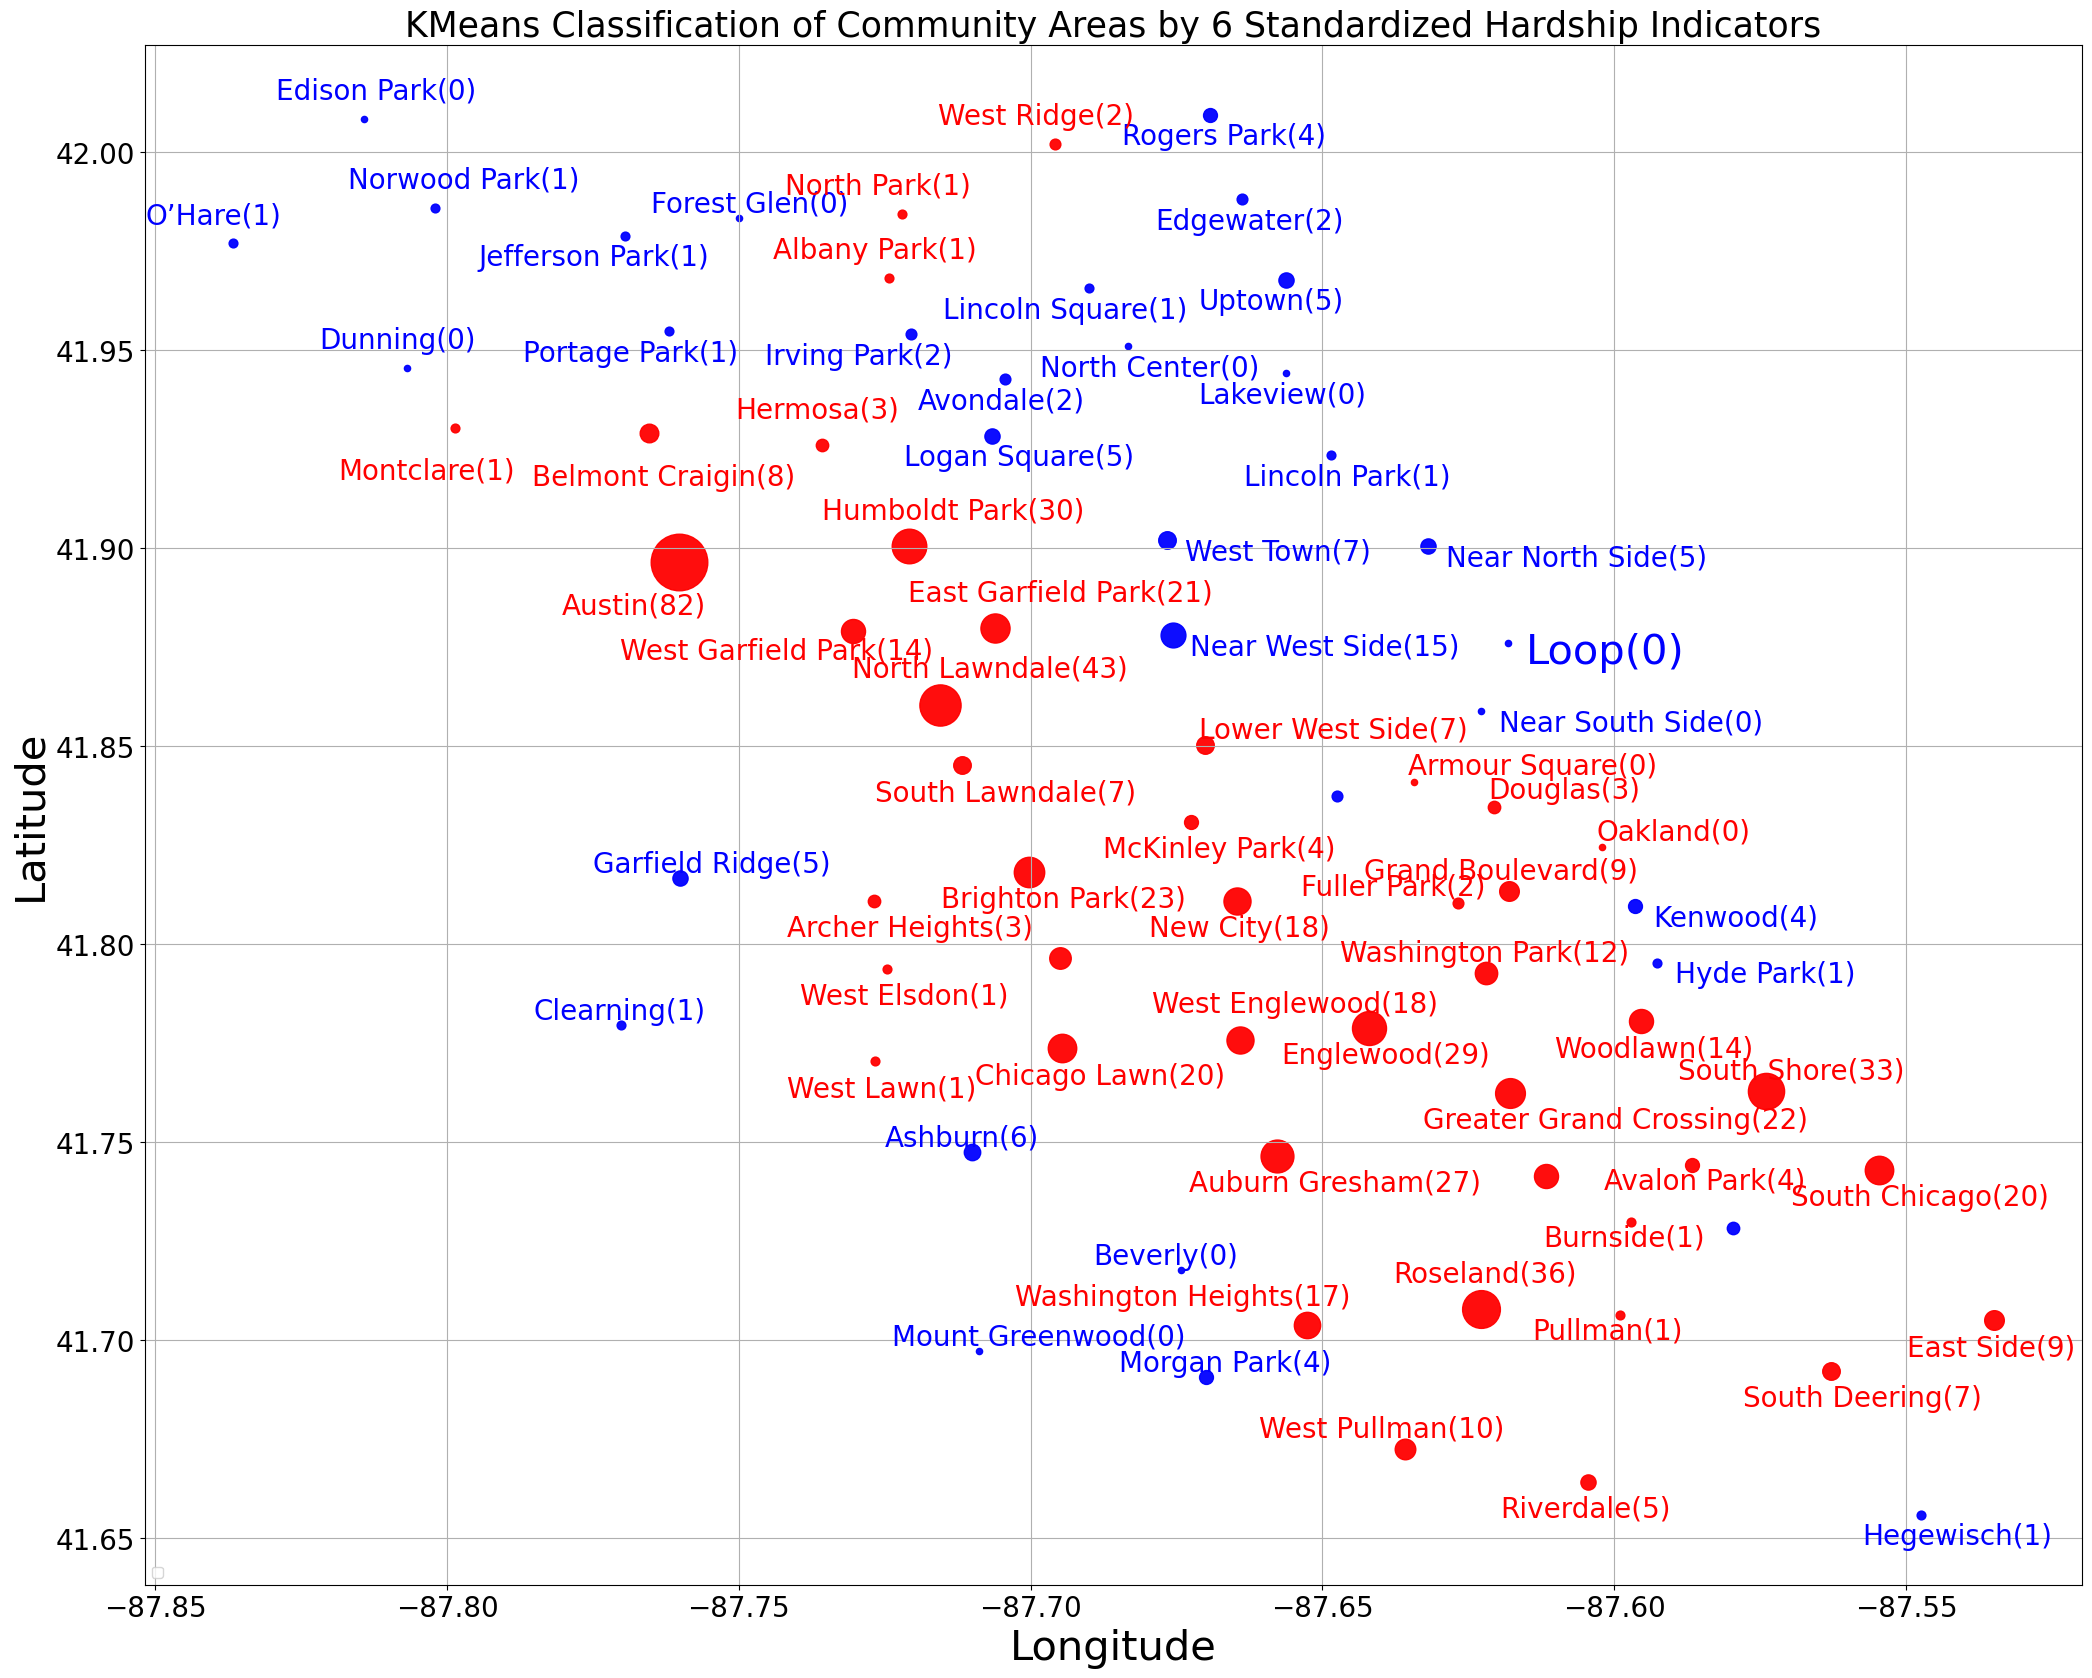

In [12]:
fig=plt.figure(figsize=(25,20))

for i in hom_df.index:
    if hom_df.loc[i,"CLASS"]==0:   #toggle class (0 or 1) if "Loop" does not appear on the map
        plt.scatter(hom_df.loc[i,'LON'], hom_df.loc[i,'LAT'],s=20*hom_df.loc[i,'HOM17']+20,color='b', alpha=0.95)
        if hom_df.loc[i,"Community"] in ["Loop"]:
            plt.gca().text(hom_df.loc[i,'LON']+.003, hom_df.loc[i,'LAT']-.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='blue', size=30)
        if hom_df.loc[i,"Community"] in ["Hyde Park","Near West Side","Kenwood","Near North Side","Near South Side","West Town"]:
            plt.gca().text(hom_df.loc[i,'LON']+.003, hom_df.loc[i,'LAT']-.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='blue', size=20)
        if hom_df.loc[i,"Community"] in ["Lincoln Park","Lakeview","Uptown","Edgewater","Rogers Park","Logan Square","Avondale","North Center"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015, hom_df.loc[i,'LAT']-.0075, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='blue', size=20)
        if hom_df.loc[i,"Community"] in ["Lincoln Square","Irving Park","Portage Park","Jefferson Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025, hom_df.loc[i,'LAT']-.0075, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='blue', size=20)
        if hom_df.loc[i,"Community"] in ["Dunning","O’Hare","Edison Park","Norwood Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='blue', size=20)
        if hom_df.loc[i,"Community"] in ["Forest Glen","Garfield Ridge","Clearning","Ashburn","Beverly","Mount Greenwood","Morgan Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015, hom_df.loc[i,'LAT']+.0015, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='blue', size=20)
    
        
        
        if hom_df.loc[i,"Community"] in ["Hegewisch"]:
            plt.gca().text(hom_df.loc[i,'LON']-.01, hom_df.loc[i,'LAT']-.0075, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='blue', size=20)
    
    
    else:
        plt.scatter(hom_df.loc[i,'LON'], hom_df.loc[i,'LAT'],s=20*hom_df.loc[i,'HOM17']+20,color='r', alpha=0.95)
        if hom_df.loc[i,"Community"] in ["Austin","Belmont Craigin","Montclare"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']-.013, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)
        if hom_df.loc[i,"Community"] in ["Woodlawn","Englewood","Chicago Lawn","South Lawndale","McKinley Park","Brighton Park","Archer Heights","West Elsdon","West Lawn","New City","Greater Grand Crossing","Auburn Gresham","South Chicago","East Side","South Deering","Riverdale"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']-.009, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)
        if hom_df.loc[i,"Community"] in ["Avalon Park","Burnside","Pullman"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']-.006,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)
        if hom_df.loc[i,"Community"] in ["Roseland","North Lawndale","East Garfield Park","Hermosa","West Englewood","Humboldt Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.007,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)
        if hom_df.loc[i,"Community"] in ["West Garfield Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.04,hom_df.loc[i,'LAT']-.007,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)
        if hom_df.loc[i,"Community"] in ["Lower West Side","Oakland","Douglas","Armour Square"]:
            plt.gca().text(hom_df.loc[i,'LON']-.001,hom_df.loc[i,'LAT']+.002,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)
        if hom_df.loc[i,"Community"] in ["Bridgeport"]:
            plt.gca().text(hom_df.loc[i,'LON']-.01,hom_df.loc[i,'LAT']-.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)
        if hom_df.loc[i,"Community"] in ["South Shore"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.003,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)
        if hom_df.loc[i,"Community"] in ["Washington Park","West Pullman","Grand Boulevard"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025,hom_df.loc[i,'LAT']+.003,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)
        if hom_df.loc[i,"Community"] in ["Fuller Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.027,hom_df.loc[i,'LAT']+.002,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)
        if hom_df.loc[i,"Community"] in ["Washington Heights"]:
            plt.gca().text(hom_df.loc[i,'LON']-.05,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)
        if hom_df.loc[i,"Community"] in ["West Ridge","North Park","Albany Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)

#plt.gca().set_facecolor('lightgray')
plt.gca().grid()
plt.yticks(fontsize=20) 
plt.xticks(fontsize=20)
#title
plt.title('KMeans Classification of Community Areas by 6 Standardized Hardship Indicators',size=25)
plt.xlabel("Longitude",size=30)
plt.ylabel("Latitude",size=30)
plt.legend(loc="lower left")
fig.savefig("Fig4.png") 
#show the plot
plt.show()

```{admonition} Exercise
Note that the Near North Side has the same homicide count as Riverdale. However, the homicide rate in Riverdale was 10 times higher than the Near North Side.  Using the 2017 data, change the marker size so that it corresponds to homicide rate (per 10,000 people) rather than homicide count.
 ```
